* instant - A unique sequential ID number for each row
* dteday - The date of the rentals
* season - The season in which the rentals occurred
* yr - The year the rentals occurred
* mnth - The month the rentals occurred
* hr - The hour the rentals occurred
* holiday - Whether or not the day was a holiday
* weekday - The day of the week (as a number, 0 to 7)
* workingday - Whether or not the day was a working day
* weathersit - The weather (as a categorical variable)
* temp - The temperature, on a 0-1 scale
* atemp - The adjusted temperature
* hum - The humidity, on a 0-1 scale
* windspeed - The wind speed, on a 0-1 scale
* casual - The number of casual riders (people who hadn't previously signed up with the bike sharing program)
* registered - The number of registered riders (people who had already signed up)
* cnt - The total number of bike rentals (casual + registered)

### Target
* Total bike rented in an hour (cnt)

### Features
* no causal and registered



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
bike_rentals=pd.read_csv('bike_rental_hour.csv')
bike_rentals.head()



,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


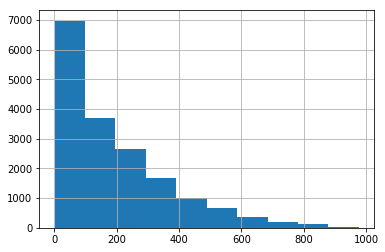

In [6]:
bike_rentals['cnt'].hist()

In [8]:
bike_rentals.corr()["cnt"]

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [9]:
def assign_label(hr):
    if hr in [x for x in range(6,12)]:
        return 1
    elif hr in [x for x in range(12,18)]:
        return 2
    elif hr in [x for x in range(18,24)]:
        return 3
    else:
        return 4
bike_rentals['time_label']= bike_rentals['hr'].apply(assign_label)

### Instructions
* Pick an error metric: mean ansolute value?
* select 80% of the bike_rentals to be training
* The rows not in train assigned to test

### Notes:
* The good thing about linear regression is that it's fairly resistant to overfitting because it's straightforward. It also can be prone to underfitting the data, however, and not building a powerful enough model. This means that linear regression usually isn't the most accurate option.

In [11]:
train=bike_rentals.sample(frac=.8,random_state=1)
test=bike_rentals.loc[~bike_rentals.index.isin(train.index)]

In [15]:
# Remove unwanted features
features=bike_rentals.columns.tolist()
for col in ['cnt','casual','dteday','registered']:
    features.remove(col)
print(features)

['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'time_label']


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr=LinearRegression()
lr.fit(train[features],train['cnt'])
predictions=lr.predict(test[features])

mse=mean_squared_error(test['cnt'],predictions)

In [17]:
mse

17052.124871247568

#### the performance of the model depends highly on what features used to build the model.

* The error is very high, which may be due to the fact that the data has a few extremely high rental counts, but otherwise mostly low counts. Larger errors are penalized more with MSE, which leads to a higher total error.

* Also, our predictions have negative values, which are not correct for "count", but we did predict the twin peaks. 


### Decision Tree

In [18]:
from sklearn.tree import DecisionTreeRegressor

tree=DecisionTreeRegressor(random_state=1)
# We've already loaded the variable "income," which contains all of the income data
tree.fit(train[features],train['cnt'])
predictions=tree.predict(test[features])
mse=mean_squared_error(test['cnt'],predictions)
print(mse)

3223.42146145


In [19]:
#### Test different parameters
tree=DecisionTreeRegressor(random_state=1,max_depth=7)
# We've already loaded the variable "income," which contains all of the income data
tree.fit(train[features],train['cnt'])
predictions=tree.predict(test[features])
mse=mean_squared_error(test['cnt'],predictions)
print(mse)

predictions=tree.predict(train[features])
mse=mean_squared_error(train['cnt'],predictions)
print(mse) ### Overfitting

6904.16299773
6444.15134032


In [20]:
#### Test different parameters
tree=DecisionTreeRegressor(random_state=1,min_samples_leaf=50)
# We've already loaded the variable "income," which contains all of the income data
tree.fit(train[features],train['cnt'])
predictions=tree.predict(test[features])
mse=mean_squared_error(test['cnt'],predictions)
print(mse)

predictions=tree.predict(train[features])
mse=mean_squared_error(train['cnt'],predictions)
print(mse) ### Overfitting

4017.30948185
3438.9948259


### Thoughts
I tested parameters such as min_samples_split, and max_depth and found out there are some optimized values for the errors using train/test to predict to be closest. For example, max_depth=7 and min_samples_split=200. That is we cannot let decision tree to form the complete tree for the training dataset, otherwise it will overfitted the training dataset and performs terribly in the testing dataset.

But overall, no matter what parameter used, the decision tree classifier produces much smaller errors than the simple linear regression model. 

### Random Forests

In [21]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=20, random_state=1,min_samples_leaf=50)
rf.fit(train[features],train['cnt'])
predictions=rf.predict(test[features])
mse=mean_squared_error(test['cnt'],predictions)
print(mse)

predictions=rf.predict(train[features])
mse=mean_squared_error(train['cnt'],predictions)
print(mse) ### Overfitting


4066.15400826
3603.48212655


In [22]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=150, random_state=1,min_samples_leaf=10)
rf.fit(train[features],train['cnt'])
predictions=rf.predict(test[features])
mse=mean_squared_error(test['cnt'],predictions)
print(mse)

predictions=rf.predict(train[features])
mse=mean_squared_error(train['cnt'],predictions)
print(mse) ### Overfitting


2338.83550206
1488.04827158


### Thoughts:
Use random forest we can obtain the lowest mean square error (2338.83, reduced from 17052) using the same features. But It's very easy to overfit the training data (see the difference between two mse values.) But with large number of estimators and constraining the numbers of sample in each leaf, we can achieve very good result. 

### Potential Next Steps:
* Predict `casual` and `registered` instead of `cnt`
* create new features, such as the combination of weather variables >> like time three variables together? 
* Cross-grid cv

In [28]:
bike_rentals.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'time_label', 'weather'],
      dtype='object')

In [26]:
bike_rentals['weather']=bike_rentals['windspeed']*bike_rentals['temp']*bike_rentals['hum']
train=bike_rentals.sample(frac=.8,random_state=1)
test=bike_rentals.loc[~bike_rentals.index.isin(train.index)]

In [29]:
# Remove unwanted features
features=bike_rentals.columns.tolist()
for col in ['cnt','casual','dteday','registered','weathersit']:
    features.remove(col)
print(features)

['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'time_label', 'weather']


In [30]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=150, random_state=1,min_samples_leaf=10)
rf.fit(train[features],train['cnt'])
predictions=rf.predict(test[features])
mse=mean_squared_error(test['cnt'],predictions)
print(mse)

predictions=rf.predict(train[features])
mse=mean_squared_error(train['cnt'],predictions)
print(mse) ### Overfitting


2452.78579827
1585.56641251


In [31]:
rf=RandomForestRegressor(n_estimators=150, random_state=1,min_samples_leaf=10)
rf.fit(train[features],train['casual'])
predictions=rf.predict(test[features])
mse=mean_squared_error(test['casual'],predictions)
print(mse)

predictions=rf.predict(train[features])
mse=mean_squared_error(train['casual'],predictions)
print(mse) ### Overfitting

265.955533681
171.275258557


In [33]:
rf=RandomForestRegressor(n_estimators=150, random_state=1,min_samples_leaf=10)
rf.fit(train[features],train['registered'])
predictions=rf.predict(test[features])
mse=mean_squared_error(test['registered'],predictions)
print(mse)

#predictions=rf.predict(train[features])
#mse=mean_squared_error(train['registered'],predictions)
#print(mse) ### Overfitting

1776.7387443


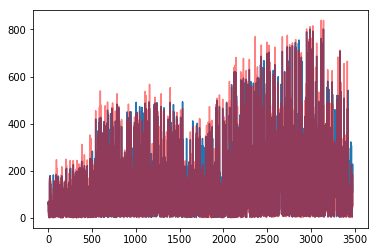

In [35]:
plt.plot(predictions)
plt.plot(test['registered'].values,color='r',alpha=0.5)